## Librerias

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import toolbox_martin as tbm
import urllib.request
from PIL import Image


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,  r2_score, classification_report, accuracy_score, ConfusionMatrixDisplay, make_scorer, accuracy_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Data

In [48]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("data/train.csv")

## Data exploration

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         912 non-null    int64  
 1   Company           912 non-null    object 
 2   Product           912 non-null    object 
 3   TypeName          912 non-null    object 
 4   Inches            912 non-null    float64
 5   ScreenResolution  912 non-null    object 
 6   Cpu               912 non-null    object 
 7   Ram               912 non-null    object 
 8   Memory            912 non-null    object 
 9   Gpu               912 non-null    object 
 10  OpSys             912 non-null    object 
 11  Weight            912 non-null    object 
 12  Price_in_euros    912 non-null    float64
dtypes: float64(2), int64(1), object(10)
memory usage: 92.8+ KB


In [50]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
0,755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
1,618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
2,909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
3,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
4,286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [51]:
df.describe()

,laptop_ID,Inches,Price_in_euros
count,912.000000,912.000000,912.000000
mean,650.312500,14.981579,1111.724090
std,382.727748,1.436719,687.959172
min,2.000000,10.100000,174.000000
25%,324.750000,14.000000,589.000000
50%,636.500000,15.600000,978.000000
75%,982.250000,15.600000,1483.942500
max,1320.000000,18.400000,6099.000000


### Información de las variables

laptop_ID: Identificación única asignada a cada laptop.

Company: Nombre de la empresa fabricante de la laptop.

Product: Modelo específico de la laptop.

TypeName: Tipo de la laptop, como "Notebook," "Gaming," "Ultrabook," o "Workstation."

Inches: Tamaño de la pantalla en pulgadas.

ScreenResolution: Resolución de la pantalla, indicando la calidad y nitidez.

Cpu: Procesador central (CPU) de la laptop, incluyendo la marca y la velocidad.

Ram: Cantidad de memoria RAM en gigabytes.

Memory: Tipo y capacidad de almacenamiento, por ejemplo, "256GB SSD" o "1TB HDD."

Gpu: Unidad de procesamiento gráfico (GPU) de la laptop.

OpSys: Sistema operativo preinstalado en la laptop.

Weight: Peso de la laptop en kilogramos.

Price_in_euros: Precio de la laptop en euros.

### Analisis Dataframe

In [52]:
# Analizo el dataframe
tbm.analizar_df(df)

,Columna,Tipo,Cardinalidad,% Cardinalidad,Numero de nulos,% Nulos
0,laptop_ID,int64,912,100.000000,0,0.0
1,Company,object,19,2.083333,0,0.0
2,Product,object,480,52.631579,0,0.0
3,TypeName,object,6,0.657895,0,0.0
4,Inches,float64,17,1.864035,0,0.0
5,ScreenResolution,object,36,3.947368,0,0.0
6,Cpu,object,107,11.732456,0,0.0
7,Ram,object,9,0.986842,0,0.0
8,Memory,object,37,4.057018,0,0.0
9,Gpu,object,93,10.197368,0,0.0


In [53]:
# Hacemos laptop_ID indice
df = pd.read_csv("data/train.csv", index_col=0)
df.index.name= None

In [54]:
# Corregimos peso
df["weight_kg"]=df['Weight'].str.replace('kg', '').astype(float)

In [55]:
# Es buena idea cambiar variables categoricas a numéricas:

## Data processing

El target es la columna `Price_in_euros`

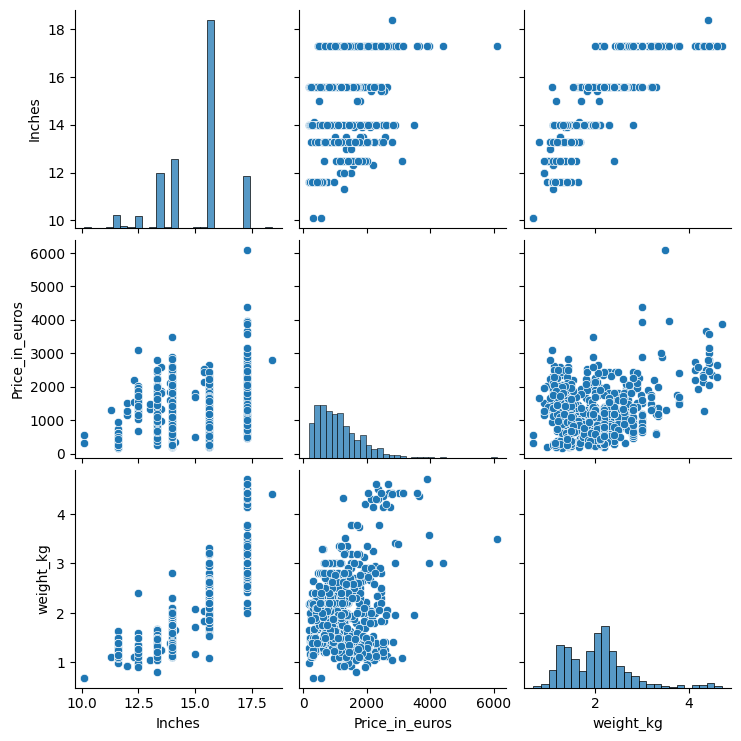

In [56]:
sns.pairplot(df)

-----------------------------------------------------------------------------------------------------------------

## Modelado

### 1. Definir X e y

In [57]:
""" X = df.drop(['Price_in_euros',"Weight", "Product","ScreenResolution","Gpu","Cpu","Memory"], axis=1)
y = df['Price_in_euros'].copy()
X.shape """

' X = df.drop([\'Price_in_euros\',"Weight", "Product","ScreenResolution","Gpu","Cpu","Memory"], axis=1)\ny = df[\'Price_in_euros\'].copy()\nX.shape '

In [58]:
X=df[["Inches","weight_kg"]]
X.shape

(912, 2)

In [59]:
y = df['Price_in_euros'].copy()
y.shape

(912,)

### 2. Dividir X_train, X_test, y_train, y_test

In [60]:
# Definir las columnas categóricas y numéricas
categorical_columns = ['TypeName', 'Company', 'Ram', 'OpSys']
numeric_columns = ['Inches', 'weight_kg']

In [61]:
""" # Manejar datos categóricos si es necesario (codificar etiquetas)
label_encoder = LabelEncoder()
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column]) """

' # Manejar datos categóricos si es necesario (codificar etiquetas)\nlabel_encoder = LabelEncoder()\nfor column in categorical_columns:\n    X[column] = label_encoder.fit_transform(X[column]) '

In [62]:
""" # Manejar variables categóricas con OneHotEncoder
categorical_columns = ['TypeName', 'Company', 'Ram', 'OpSys']
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True) """

" # Manejar variables categóricas con OneHotEncoder\ncategorical_columns = ['TypeName', 'Company', 'Ram', 'OpSys']\nX = pd.get_dummies(X, columns=categorical_columns, drop_first=True) "

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.0, random_state = 42)

InvalidParameterError: The 'test_size' parameter of train_test_split must be a float in the range (0.0, 1.0), an int in the range [1, inf) or None. Got 0.0 instead.

In [ ]:
# Escalar los datos (normalización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 3. Baseline de modelos


In [ ]:
# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_predict = model.predict(X_test_scaled)


### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de RMSE.

In [ ]:
# Calcular RMSE directamente
rmse = mean_squared_error(y_test, y_predict, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 748.578429898522


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [ ]:
X_pred = pd.read_csv("data/test.csv", index_col=0)
X_pred.index.name=None
X_pred.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [ ]:
# Corregimos peso
X_pred["weight_kg"]=X_pred['Weight'].str.replace('kg', '').astype(float)

In [ ]:
# hacer todas las transformaciones del test

In [ ]:
""" # Encode categorical columns in X_pred
for column in categorical_columns:
    X_pred[column] = label_encoder.fit_transform(X_pred[column]) """

In [ ]:
""" # One-hot encode categorical columns in X_pred
X_pred = pd.get_dummies(X_pred, columns=categorical_columns, drop_first=True) """

In [ ]:
X_pred_num=X_pred[["Inches","weight_kg"]]

In [ ]:
X_pred_num

,Inches,weight_kg
209,15.6,2.400
1281,15.6,2.400
1168,15.6,1.900
1231,15.6,2.191
1020,14.0,1.950
...,...,...
820,17.3,2.900
948,14.0,1.470
483,15.6,1.780
1017,14.0,1.640


In [ ]:
X_pred_scaled = scaler.transform(X_pred_num)

In [ ]:
predictions_submit = model.predict(X_pred_scaled)
predictions_submit

array([1189.97922003, 1189.97922003,  917.46386874, 1076.06780319,
       1248.64568104,  976.05944105, 1205.04322484, 1194.07172208,
       1135.47614977, 1057.88493514, 1902.61163544,  978.2924574 ,
       1085.06558156, 1685.95715938,  917.46386874,  890.21233361,
       1070.07246546,  918.33908011,  965.2297157 , 1135.47614977,
       1631.45408912, 1054.59675576,  992.41036212, 1109.09982602,
       1135.47614977, 1080.97307951, 1003.31097618, 1135.54703848,
       1935.31347759, 1085.13647027, 1619.19567009, 1026.47000926,
        944.71540387, 1968.01531975,  470.53869262, 1139.56865182,
       1070.07246546, 1244.48229029, 1168.17799193, 1016.44460658,
       1026.47000926,  972.84215037,  993.7681671 , 1085.13647027,
       1139.56865182, 1080.97307951,  971.966939  , 1026.47000926,
       1080.97307951, 1080.97307951,  862.96079848, 1080.97307951,
       1244.48229029,  950.16571089, 1125.45074709,  948.87879462,
       1080.97307951,  921.55637079,  917.46386874, 1036.01281

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [ ]:
# ¿Qué opináis?
# ¿Sí, no?

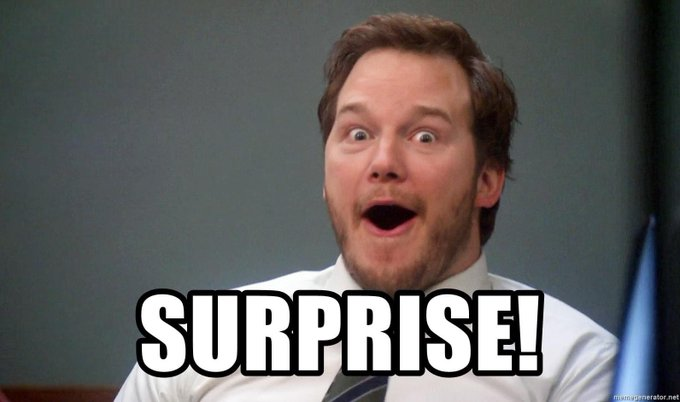

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [ ]:
sample = pd.read_csv("data/sample_submission.csv")

In [ ]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [ ]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [ ]:
submission = pd.DataFrame({"laptop_ID": X_pred.index, "Price_in_euros": predictions_submit})

In [ ]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1189.979220
1,1281,1189.979220
2,1168,917.463869
3,1231,1076.067803
4,1020,1248.645681


In [ ]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [ ]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto de Iván y Manuel: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `laptops_test.csv`. Lloramos.")

In [ ]:
chequeador(submission)

You're ready to submit!
